<a href="https://colab.research.google.com/github/nsthomp5/MAT422/blob/main/MAT_422_HW_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Name: Nicholas Thompson
# ID: 1223100502
# Class: MAT 422
# Assignment: HW 2.2

In [51]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

The probability axioms define a sample space as the set of all possible outcomes of an experiment. This example shows how the sample space of drawing a random card from a standard deck has 52 events, with each card's individual rank and suit being a complex event. It can be considered a complex event because the two characteristics of the card have their own probabilities of being drawn, but this logic may be more applicable to some card games that focus on ranks and suits individually more than others that just treat each of the 52 cards as their particular combination of rank and suit.

Other axioms describe that the union of two events in probability is the sum of the probability of each occuring, subtracting the probability of both occuring due to double-counting, and that the probability of an event not happening is 1 subtracting the probability of the event happening.

In [22]:
# 2.2.1: Probability Axioms
# Example 1: Sample Space and Complex Events

ranks = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
suits = ['Clubs', 'Diamonds', 'Hearts', 'Spades']

deck = []
for rank in ranks:
    for suit in suits:
        deck.append(rank + ' of ' + suit)

draw = random.choice(deck)
print("You drew a " + draw + ".")

print("The sample space has " + str(len(deck)) + " events.")

You drew a 5 of Spades.
The sample space has 52 events.


In [28]:
# Example 2: Probability Distribution

aocprob = 0
dprob = 0
horqprob = 0
cprob = 0

for i in range(len(deck)):
    aocprob += deck[i].count('Ace of Clubs') / len(deck)
    dprob += deck[i].count('Diamonds') / len(deck)
    horqprob += (deck[i].count('Hearts') + deck[i].count('Queen') - deck[i].count('Queen of Hearts')) / len(deck)
    cprob += deck[i].count('Clubs') / len(deck)


print("The probability of drawing an ace of clubs is " + str(aocprob) + ".")
print("The probability of drawing a diamond is " + str(dprob) + ".")
print("The probability of drawing a heart or a queen is " + str(horqprob) + ".")
print("The probability of not drawing a club is " + str(1-cprob) + ".")




The probability of drawing an ace of clubs is 0.019230769230769232.
The probability of drawing a diamond is 0.24999999999999994.
The probability of drawing a heart or a queen is 0.3076923076923076.
The probability of not drawing a club is 0.75.


Conditional probability describes the probability of an event happening given another event happens. This example shows how in baseball, the type of pitch thrown changes the probability of throwing a strike on that particular pitch, so different strike and ball probabilities are calculated with this in mind, rather than assuming the pitch choice and outcome are independent events.

In [75]:
# 2.2.2: Conditional Probability
# Example 1

ffprob = .5
slprob = .3
chprob = .1
cuprob = .1
pitchprob = 0

strikeprob = 0
ballprob = 0

randnum = random.randint(1,100)

if randnum <= ffprob*100:
  pitch = 'fastball'
  pitchprob = ffprob
if randnum <= (ffprob+slprob)*100 and randnum > ffprob*100:
  pitch = 'slider'
  pitchprob = slprob
if randnum <= (ffprob+slprob+chprob)*100 and randnum > (ffprob+slprob)*100:
  pitch = 'changeup'
  pitchprob = chprob
if randnum <= (ffprob+slprob+chprob+cuprob)*100 and randnum > (ffprob+slprob+chprob)*100:
  pitch = 'curve'
  pitchprob = cuprob

if pitch == 'fastball':
  strikeprob = .75
if pitch == 'slider':
  strikeprob = .6
if pitch == 'changeup':
  strikeprob = .55
if pitch == 'curve':
  strikeprob = .45

randnum = random.randint(1,100)

if randnum <= strikeprob*100:
  result = 'strike'
  pitchprob = pitchprob * strikeprob
if randnum > strikeprob*100:
  result = 'ball'
  pitchprob = pitchprob * (1-strikeprob)

genstrikeprob = .5*.75+.3*.6+.1*.55+.1*.45
genballprob = 1-genstrikeprob

print("The probability of throwing a strike is " + str(genstrikeprob) + ".")
print("The probability of throwing a strike given you threw a fastball is " + str(.75) + ".")

print("You threw a " + pitch + " for a " + result + " with pitch+outcome probability " + str(pitchprob)  + ".")

The probability of throwing a strike is 0.655.
The probability of throwing a strike given you threw a fastball is 0.75.
You threw a slider for a ball with probability 0.12.


A discrete random variable is a random variable with a finite, countable number of outcomes. The example presented picks numbers randomly from a list. The expected value of a discrete random variable is simply the sum of the probabilities of each number multiplied by the number itself. It represents the weighted mean of all possible outcomes. Covariance refers to the variance between two variables with the same probability distribution: being that the events possible in each variable have the same probabilities, even if the events themselves are different. This example shows doing it both manually and through a Python package.

In [69]:
# 2.2.3: Discrete Random Variables
# Example 1: Expected Value

numlist = [1,2]

exp_val = np.mean(numlist)

print("The expected value of the list is " + str(exp_val) + ".")

The expected value of the list is 1.5.


In [70]:
prob1 = .4
prob2 = .6


exp_val = (numlist[0]*prob1) + (numlist[1]*prob2)

print("The expected value of the number is " + str(exp_val) + ".")

The expected value of the number is 1.6.


In [71]:
# Example 2: Covariance

numlist2 = [3, 9]




exp_val2 = (numlist2[0]*prob1) + (numlist2[1]*prob2)

cov = prob1*(numlist[0]-exp_val)*(numlist2[0]-exp_val2) + prob2*(numlist[1]-exp_val)*(numlist2[1]-exp_val2)

print("The covariance of the list is " + str(cov) + ".")



The covariance of the list is 1.44.


In [72]:
# Example 3: Covariance

weights = [4,6]

cov = np.cov(numlist, numlist2, weights)

print("The covariance matrix of the list is " + str(cov) + ".")

The covariance matrix of the list is [[ 0.5  3. ]
 [ 3.  18. ]].


A continuous random variable is a random variable that is not countable, and is instead represented by a function. The normal probability distribution is the easiest example to work with, as the distribution is centered at the mean and can be used for hypothesis testing and finding outliers easily. It is ideal to work with approximately normally distributed data. This example shows a plot of a density curve for the normal distribution, done by plotting the function for a normal distribution centered at mean 0. A density curve is a probability curve with the area under the curve equaling 1. You can tell if data is approximately normally distributed by seeing if a plot of the outcomes on the x-axis and the amount of each of them present in the data on the y-axis.

Hypothesis testing is done with a normal distribution by checking the probability of an event occuring using the area under the density curve within a range of the x-axis event of interest.

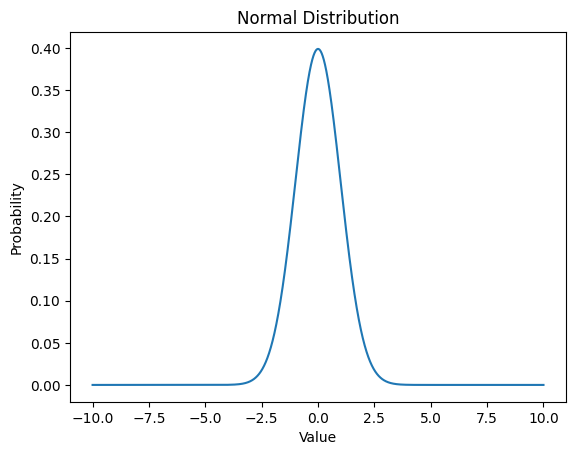

(1.0, 8.671029987439099e-10)


In [73]:
# 2.2.4: Continuous Random Variables
# Example 1: Normal Distribution

x = np.linspace(-10,10,10000)

f = lambda x: 1/(2*np.pi)**(1/2)*np.exp(-(x**2)/2)

plt.plot(x,f(x))
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

print(scipy.integrate.quad(f, -10, 10))